YF.download() has changed argument auto_adjust default to True


c:\Users\Asus\Documents\Major_Project\option_pricing-main\src\data.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.S = float(self.data['Close'].iloc[-1])  # <--- Converted to float


Current Stock Price: 205.35000610351562
Historical Volatility: 0.2643338916050543
Black-Scholes call price: 2.744042040337874
Monte Carlo call price: 2.7751375136715875
Binomial Tree call price: 2.7457789330303117
Greeks: Delta=0.4266667594462282, Gamma=0.04365035323746592, Vega=13.330216043986328, Theta=-68.54980784269107, Rho=2.3252597155099264
Newton-Raphson method converged! sigma = 1.7067235394904763
implied volatility =  1.7067235394904763
Report saved to options_report.txt


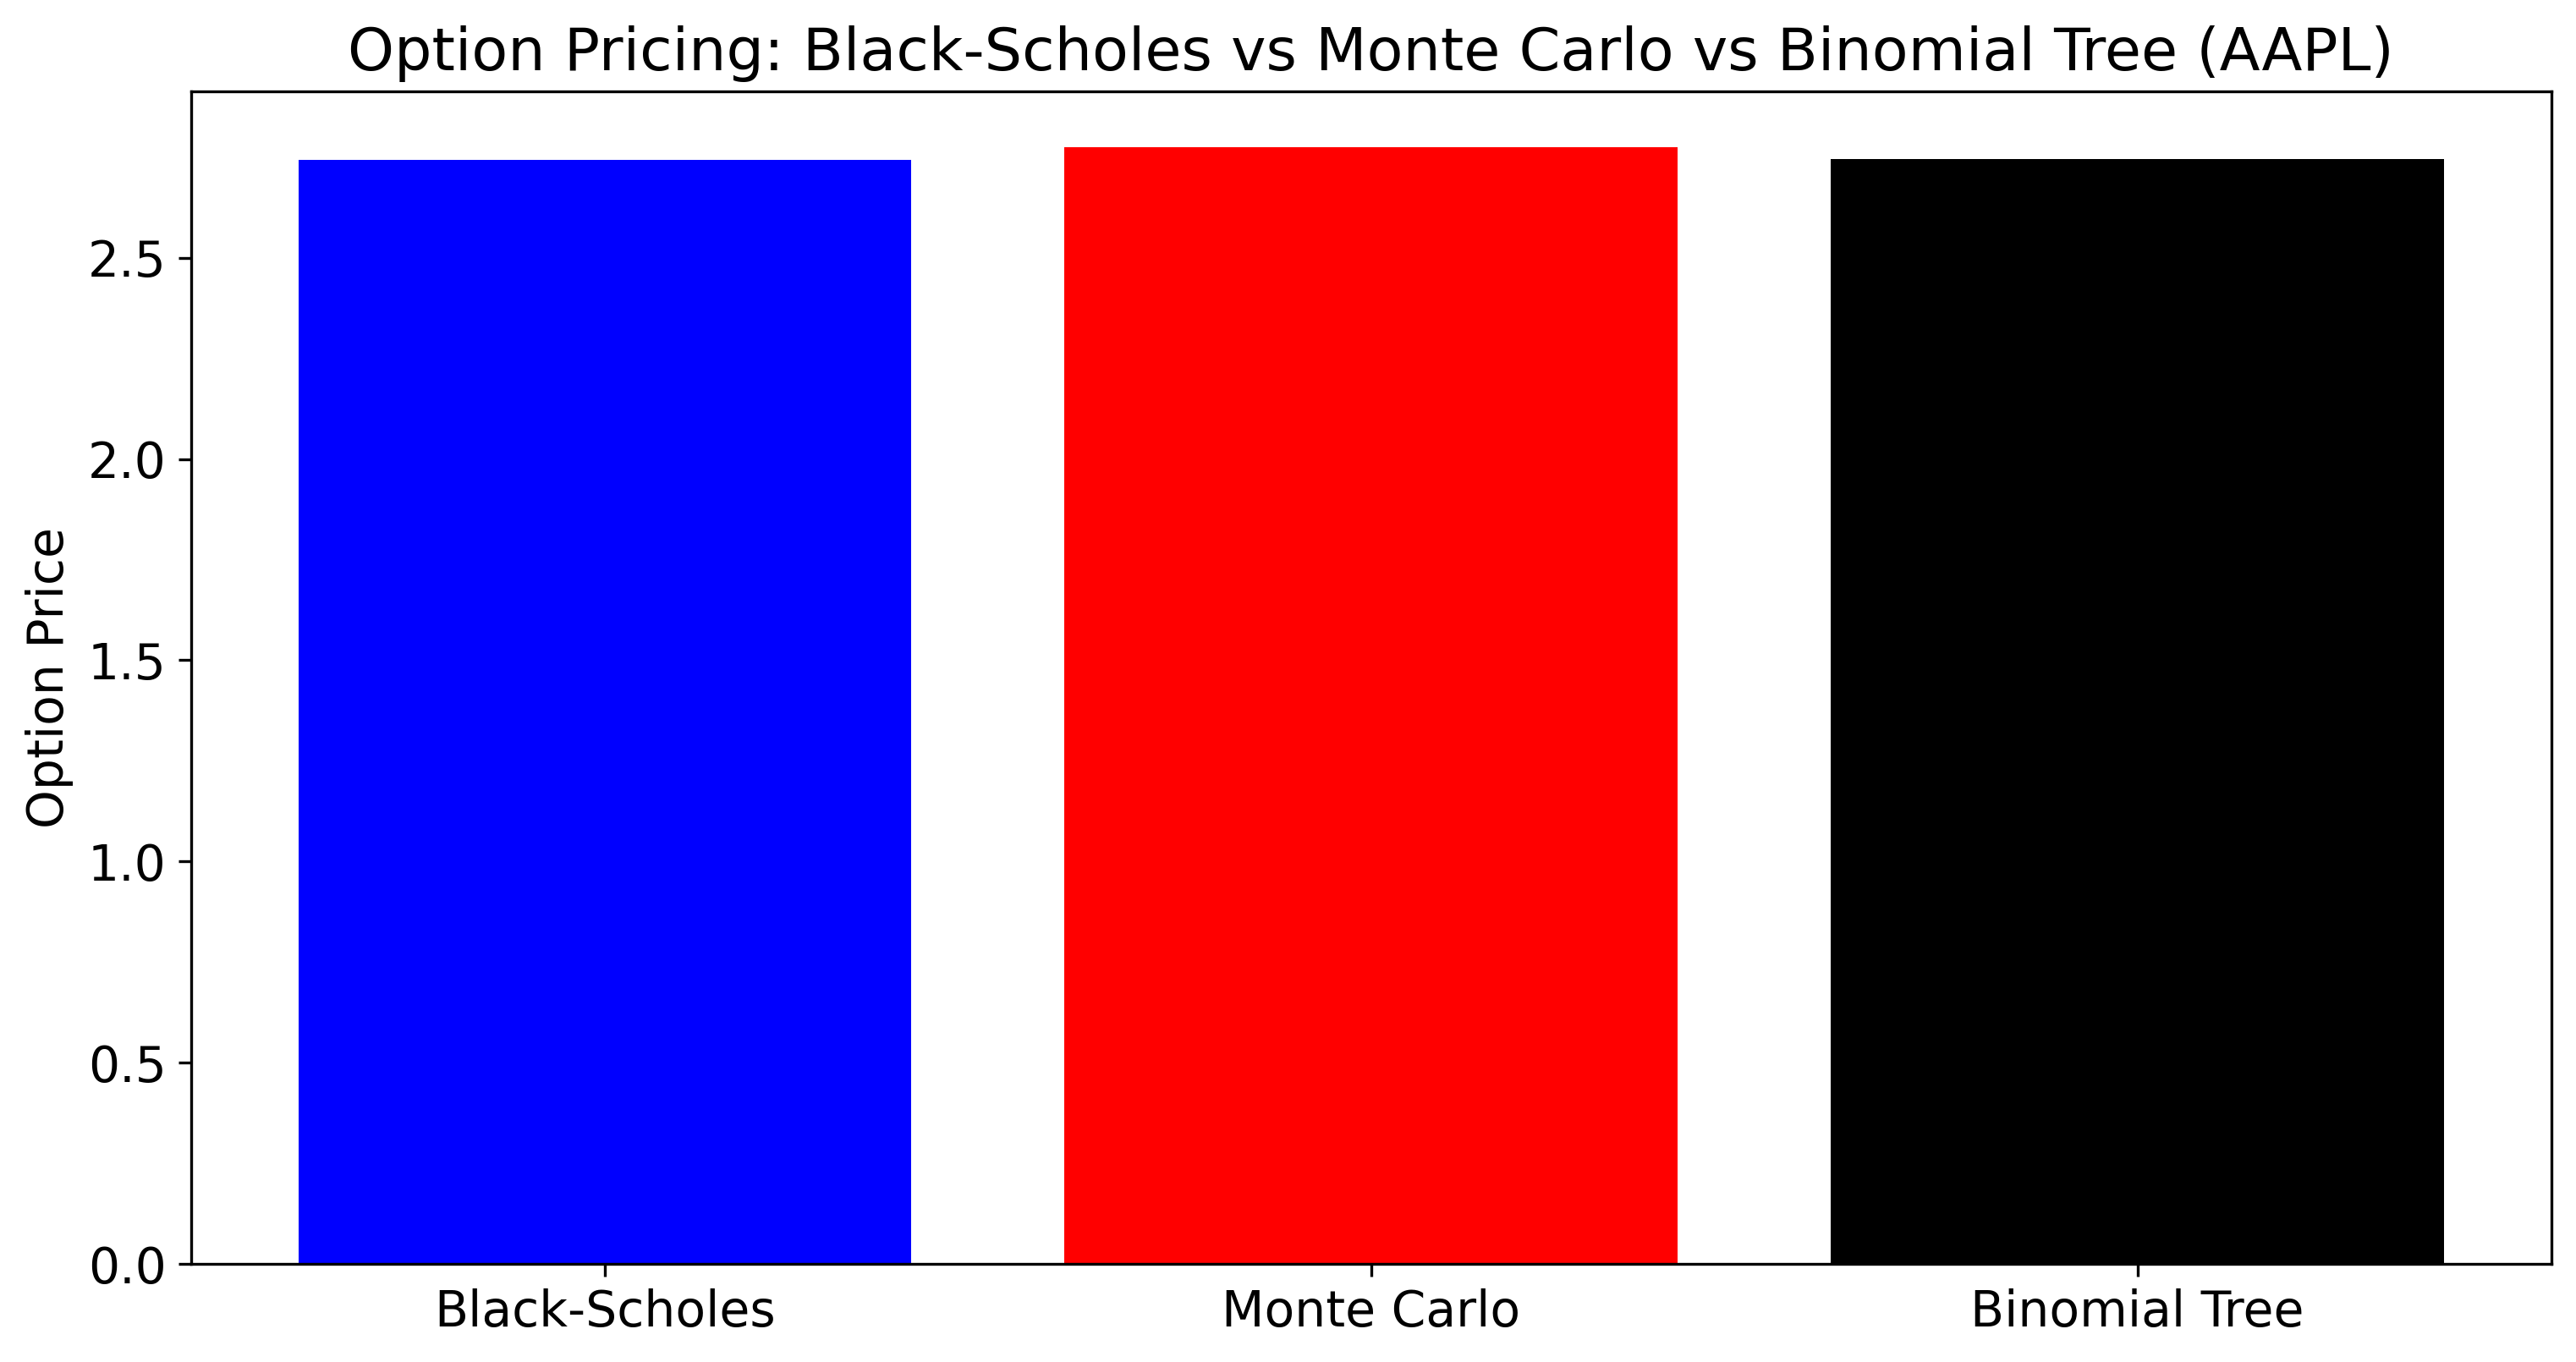

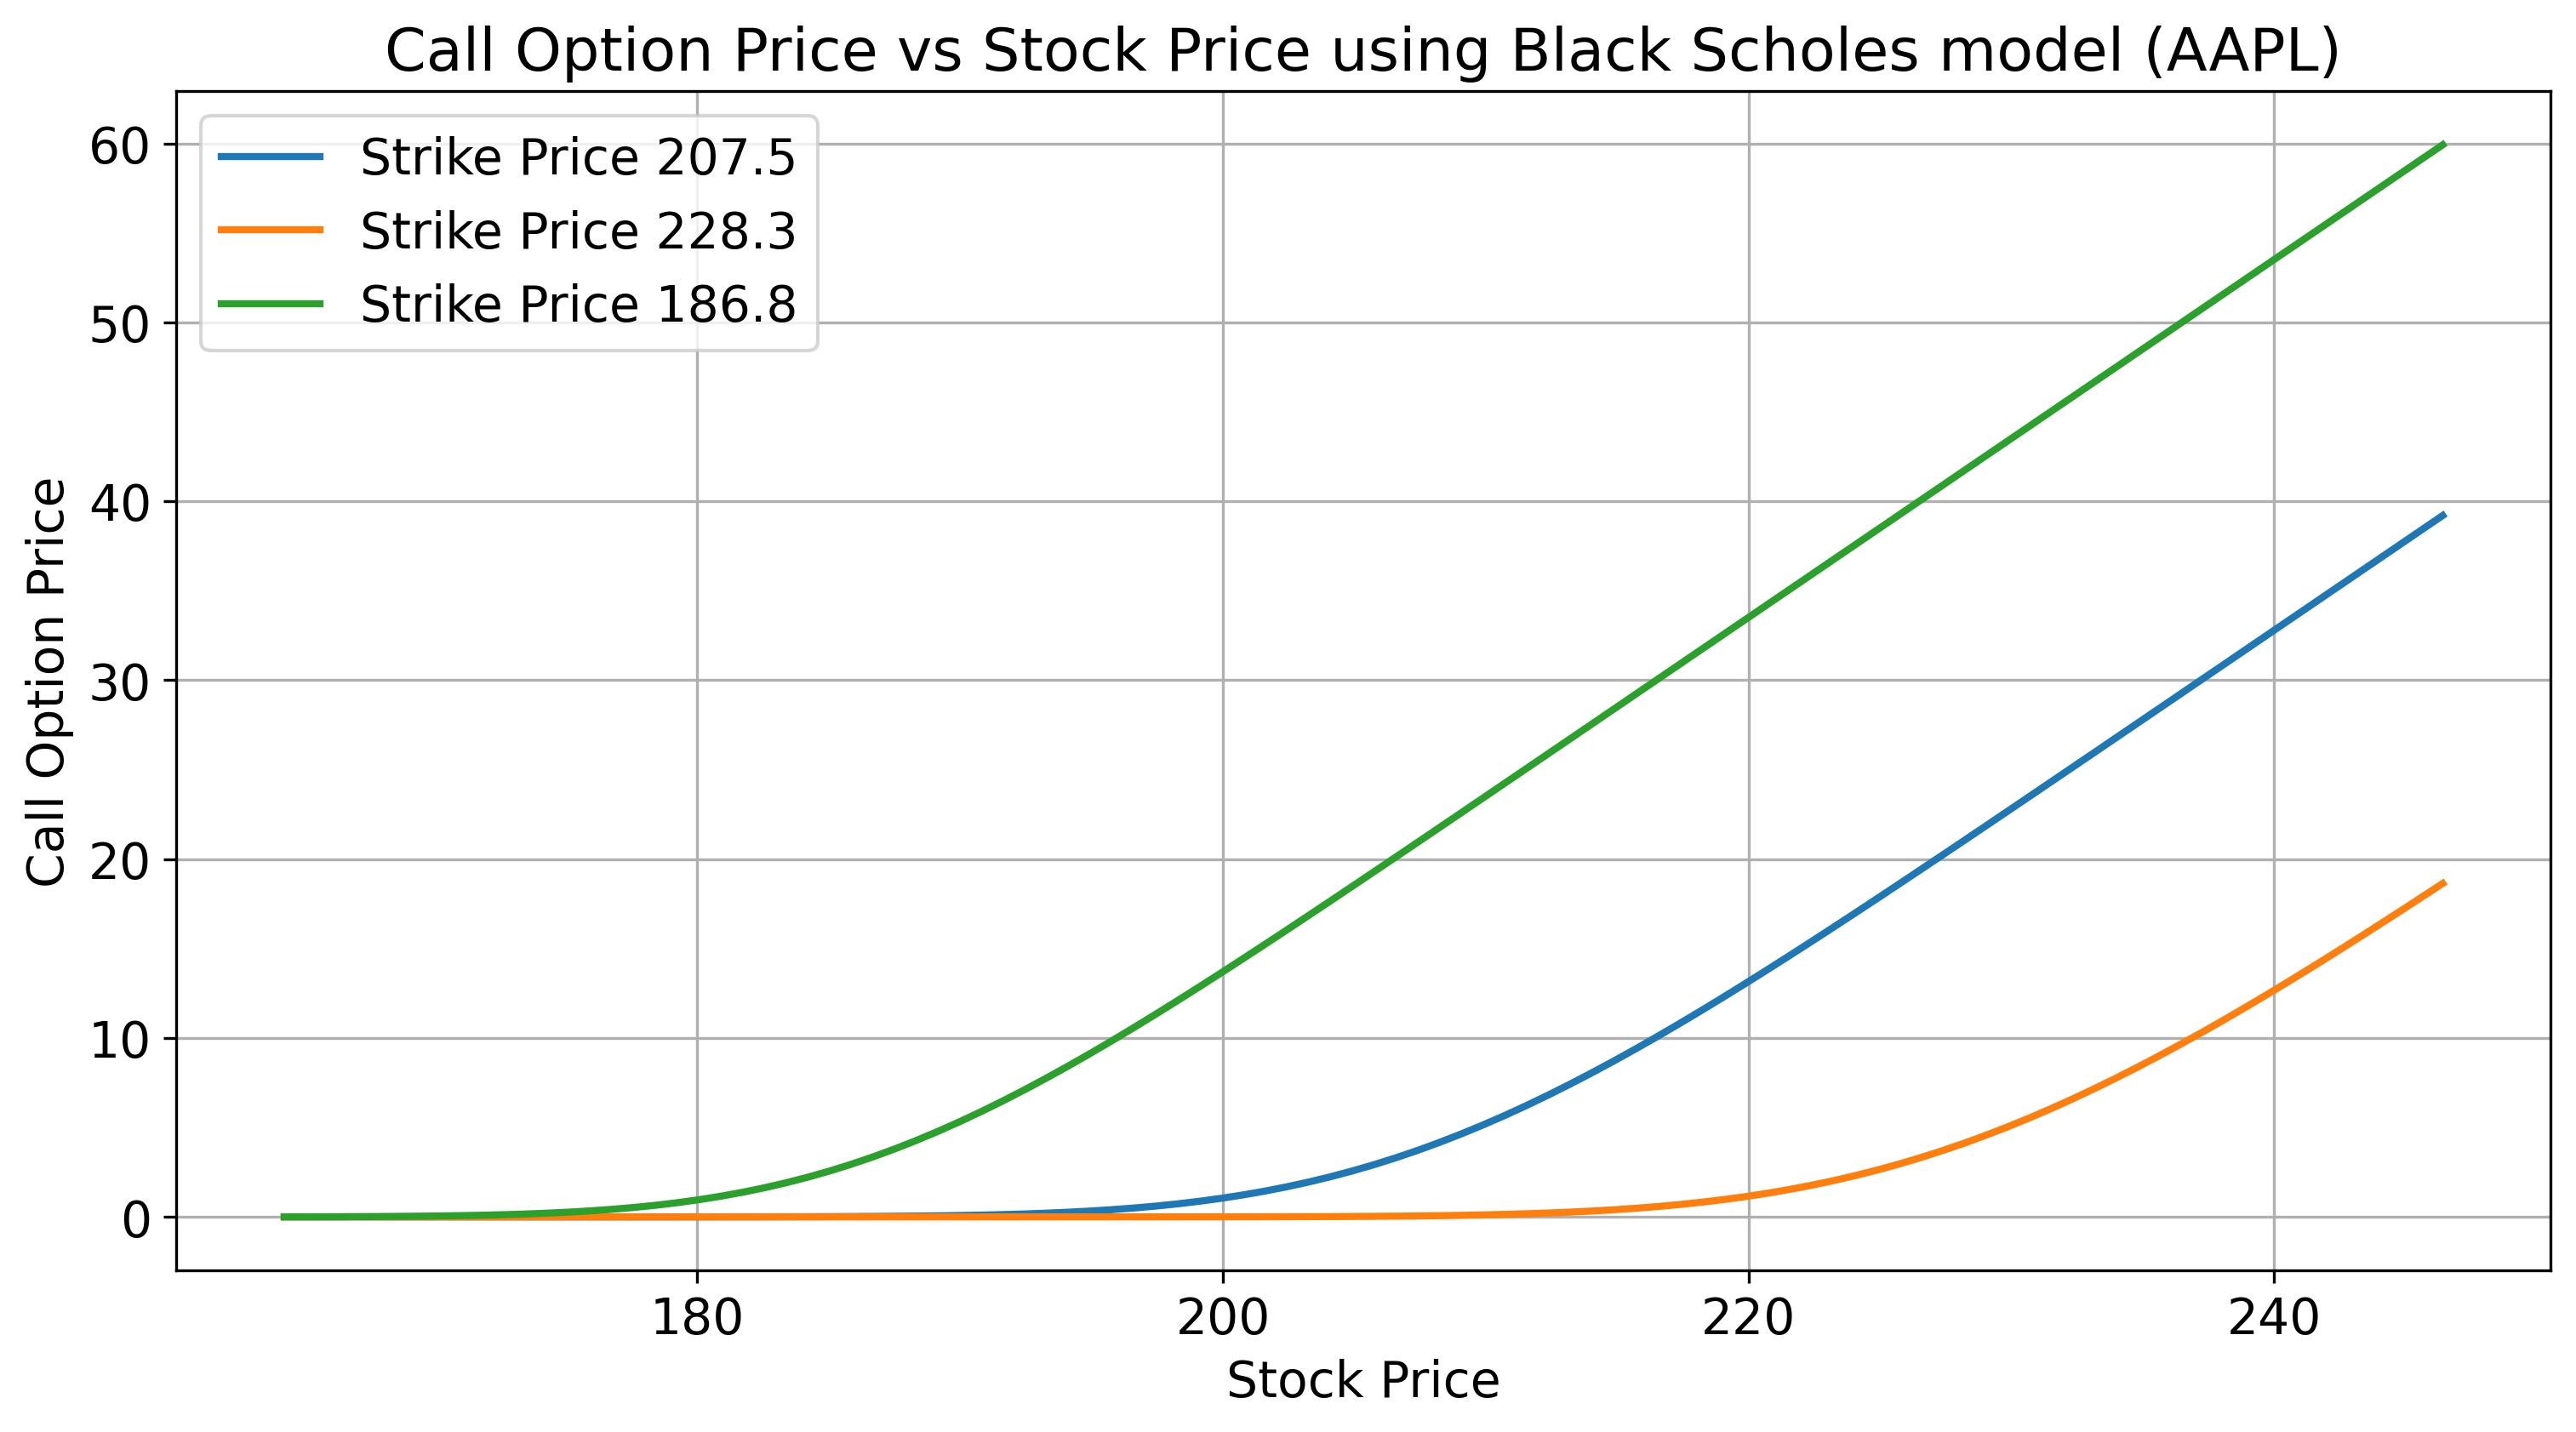

In [1]:
import os
from datetime import datetime

import pandas as pd
from data import DataHandler
from results import ResultsHandler
from greeks_volatility import GreeksVolatility
from models import OptionPricingModels
# from models import ModelType
from plots import OptionPlots
from results import ResultsHandler
from backtester import Backtester


class Main:
    def __init__(self, ticker, output_folder):
        self.ticker = ticker
        self.output_folder = output_folder

        
if __name__ == "__main__":
    # Get the current working directory
    current_dir = os.getcwd()
    # Define the output folder path in the previous directory
    OUTPUT_FOLDER = os.path.join(os.path.dirname(current_dir), "output")
    
    # User-defined parameters

    # For historical volatility
    start_date_volatility = datetime(2023, 1, 1).strftime('%Y-%m-%d')
    end_date_volatility = datetime.today().strftime('%Y-%m-%d')

    # For Monte Carlo
    mc_num_sim = 1000
    bt_num_step = 100

    # AAPL
    ticker = "AAPL"  # Example ticker
    option_type = "call"  # Can be 'call' or 'put'
    K = 207.5  # Example strike price
    days_to_maturity = 10
    T = days_to_maturity / 365  # Time to maturity (in years)
    r = 0.05  # Example risk-free rate
    market_price = 22.25  # Example market price

    # ticker = "ABNB"  # Example ticker
    # option_type = "call"  # Can be 'call' or 'put'
    # K = 118  # Example strike price
    # days_to_maturity = 4
    # T = days_to_maturity / 365  # Time to maturity (in years)
    # r = 0.05  # Example risk-free rate
    # market_price = 11.8  # Example market price


    # Use DataHandler to fetch stock data
    data_handler = DataHandler(ticker)
    data_handler.get_stock_data()
    # Retrieve the stock price (S)
    S = data_handler.S

    # Initialise GreeksVolatility class
    greeks_volatility = GreeksVolatility(S, K, T, r, market_price, ticker, option_type, OUTPUT_FOLDER)

    # Calculate historical volatility
    historical_vol = data_handler.calculate_historical_volatility(start_date_volatility, end_date_volatility)
    print(f"Historical Volatility: {historical_vol}")

    sigma = historical_vol

    # Instantiating OptionPricingModels class with parameters
    models = OptionPricingModels(S, K, T, r, sigma, option_type)

    # Calculate Black-Scholes price
    bs_price = models.black_scholes_option(q=0)
    print(f"Black-Scholes {option_type} price: {bs_price}")

    # # Calculate Monte Carlo price
    mc_price = models.monte_carlo_option_price(ticker=ticker, output_folder=OUTPUT_FOLDER, num_simulations=mc_num_sim)
    print(f"Monte Carlo {option_type} price: {mc_price[0]}")
    
    # # Calculate Binomial Tree price
    bt_price = models.binomial_tree_option_price(bt_num_step)
    print(f"Binomial Tree {option_type} price: {bt_price}")

    # Calculating Machine Learning price
    # ml_data_file = "../backtesting-data/Optiondataorg/AAPL_2013.csv"
    # ml_price = models.machine_learning_predict_mid_price(ml_data_file)
    # print(f"Machine Learning {option_type} price: {ml_price}")

    # Generate comparative pricing plot
    plots = OptionPlots(option_type, ticker, OUTPUT_FOLDER)
    plots.comparative_pricing_plot(bs_price, mc_price, bt_price)

    # Calculate Greeks
    delta, gamma, vega, theta, rho = greeks_volatility._greeks(sigma)
    print(f"Greeks: Delta={delta}, Gamma={gamma}, Vega={vega}, Theta={theta}, Rho={rho}")
    implied_vol = greeks_volatility.implied_volatility()

    # Generate report
    results_handler = ResultsHandler(ticker, OUTPUT_FOLDER, S, K, T, r, sigma, option_type, delta, gamma, vega, theta, rho, implied_vol, market_price, bs_price, mc_price[0], bt_price, start_date_volatility, end_date_volatility)
    results_handler.generate_report()

    # Plot option prices vs stock price
    option_plots = OptionPlots(option_type, ticker, OUTPUT_FOLDER)
    option_plots.plot_option_price_vs_stock_price(S, K, T, r, sigma)